In [1]:
from pyforest  import*

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.head()

<IPython.core.display.Javascript object>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.shape

(398, 9)

<IPython.core.display.Javascript object>

0.42028891210165065

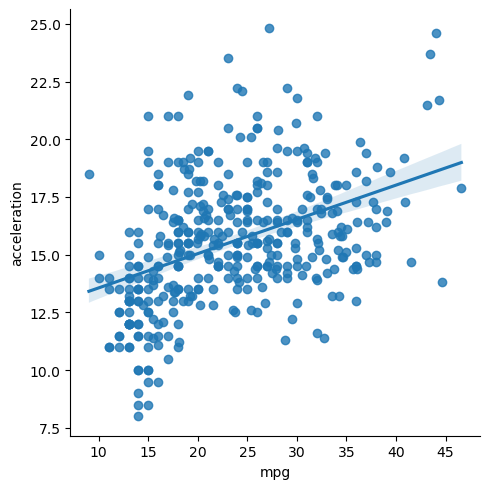

In [4]:
sns.lmplot(x='mpg', y='acceleration', data=data)
data['mpg'].corr(data['acceleration'])

<IPython.core.display.Javascript object>

-0.7753962854205543

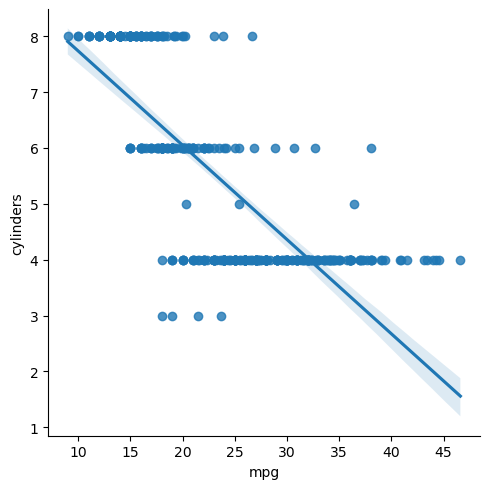

In [5]:
sns.lmplot(x='mpg', y='cylinders', data=data)
data['mpg'].corr(data['cylinders'])

<IPython.core.display.Javascript object>

-0.8317409332443351

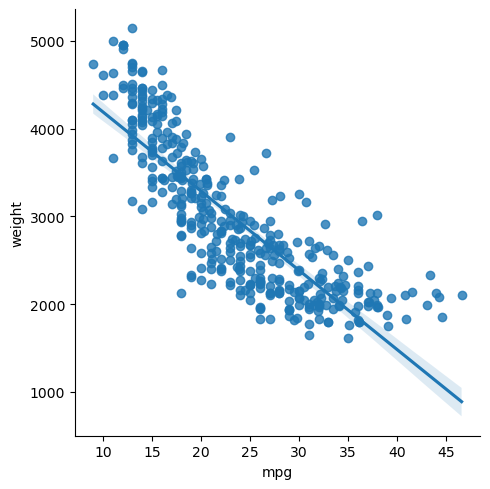

In [6]:
sns.lmplot(x='mpg', y='weight', data=data)
data['mpg'].corr(data['weight'])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [8]:
df = data.drop('car name',axis = 1 )
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
df['origin'] = df ['origin'].replace({1:'america', 2:'europe', 3:'asie'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [10]:
df = pd.get_dummies(df, columns=['origin'],dtype=int)
df

<IPython.core.display.Javascript object>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asie,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [11]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asie       0
origin_europe     0
dtype: int64

In [12]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      int32
origin_asie         int32
origin_europe       int32
dtype: object

In [13]:
hp_to_digit = pd.DataFrame(df.horsepower.str.isdigit())
hp_to_digit

<IPython.core.display.Javascript object>

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [14]:
df[hp_to_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asie,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [15]:
df = df.replace('?',np.nan)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\user\AppData\Local\Temp\ipykernel_14428\3228217076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True)

<Axes: xlabel='horsepower', ylabel='Density'>

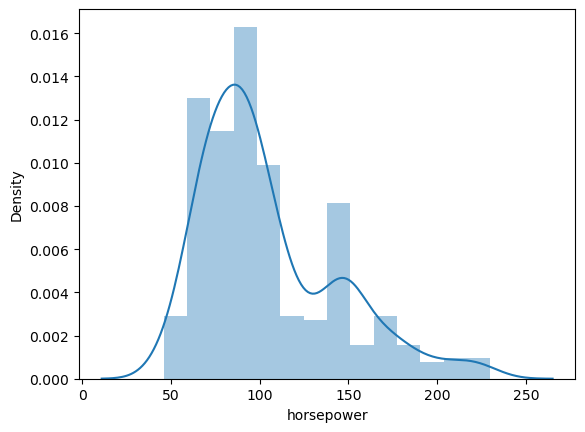

In [16]:
sns.distplot(df['horsepower'])

In [20]:
df['horsepower'] = df['horsepower'].astype('float64')
df=df.fillna(df.median())
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asie,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [21]:
df['horsepower'] = df['horsepower'].astype('float64')

In [22]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      int32
origin_asie         int32
origin_europe       int32
dtype: object

<IPython.core.display.Javascript object>

C:\Users\user\AppData\Local\Temp\ipykernel_14428\3228217076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True)

<Axes: xlabel='horsepower', ylabel='Density'>

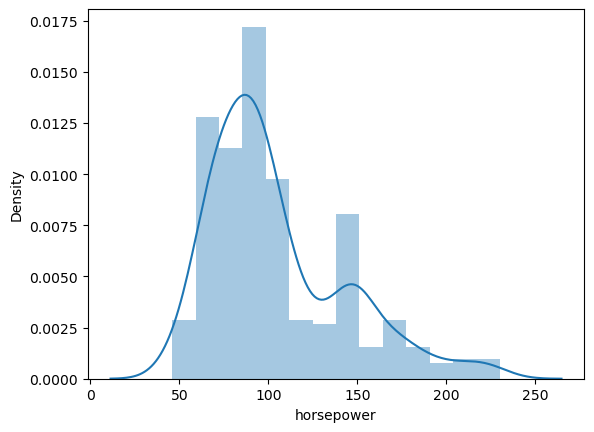

In [23]:
sns.distplot(df['horsepower'])

<IPython.core.display.Javascript object>

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

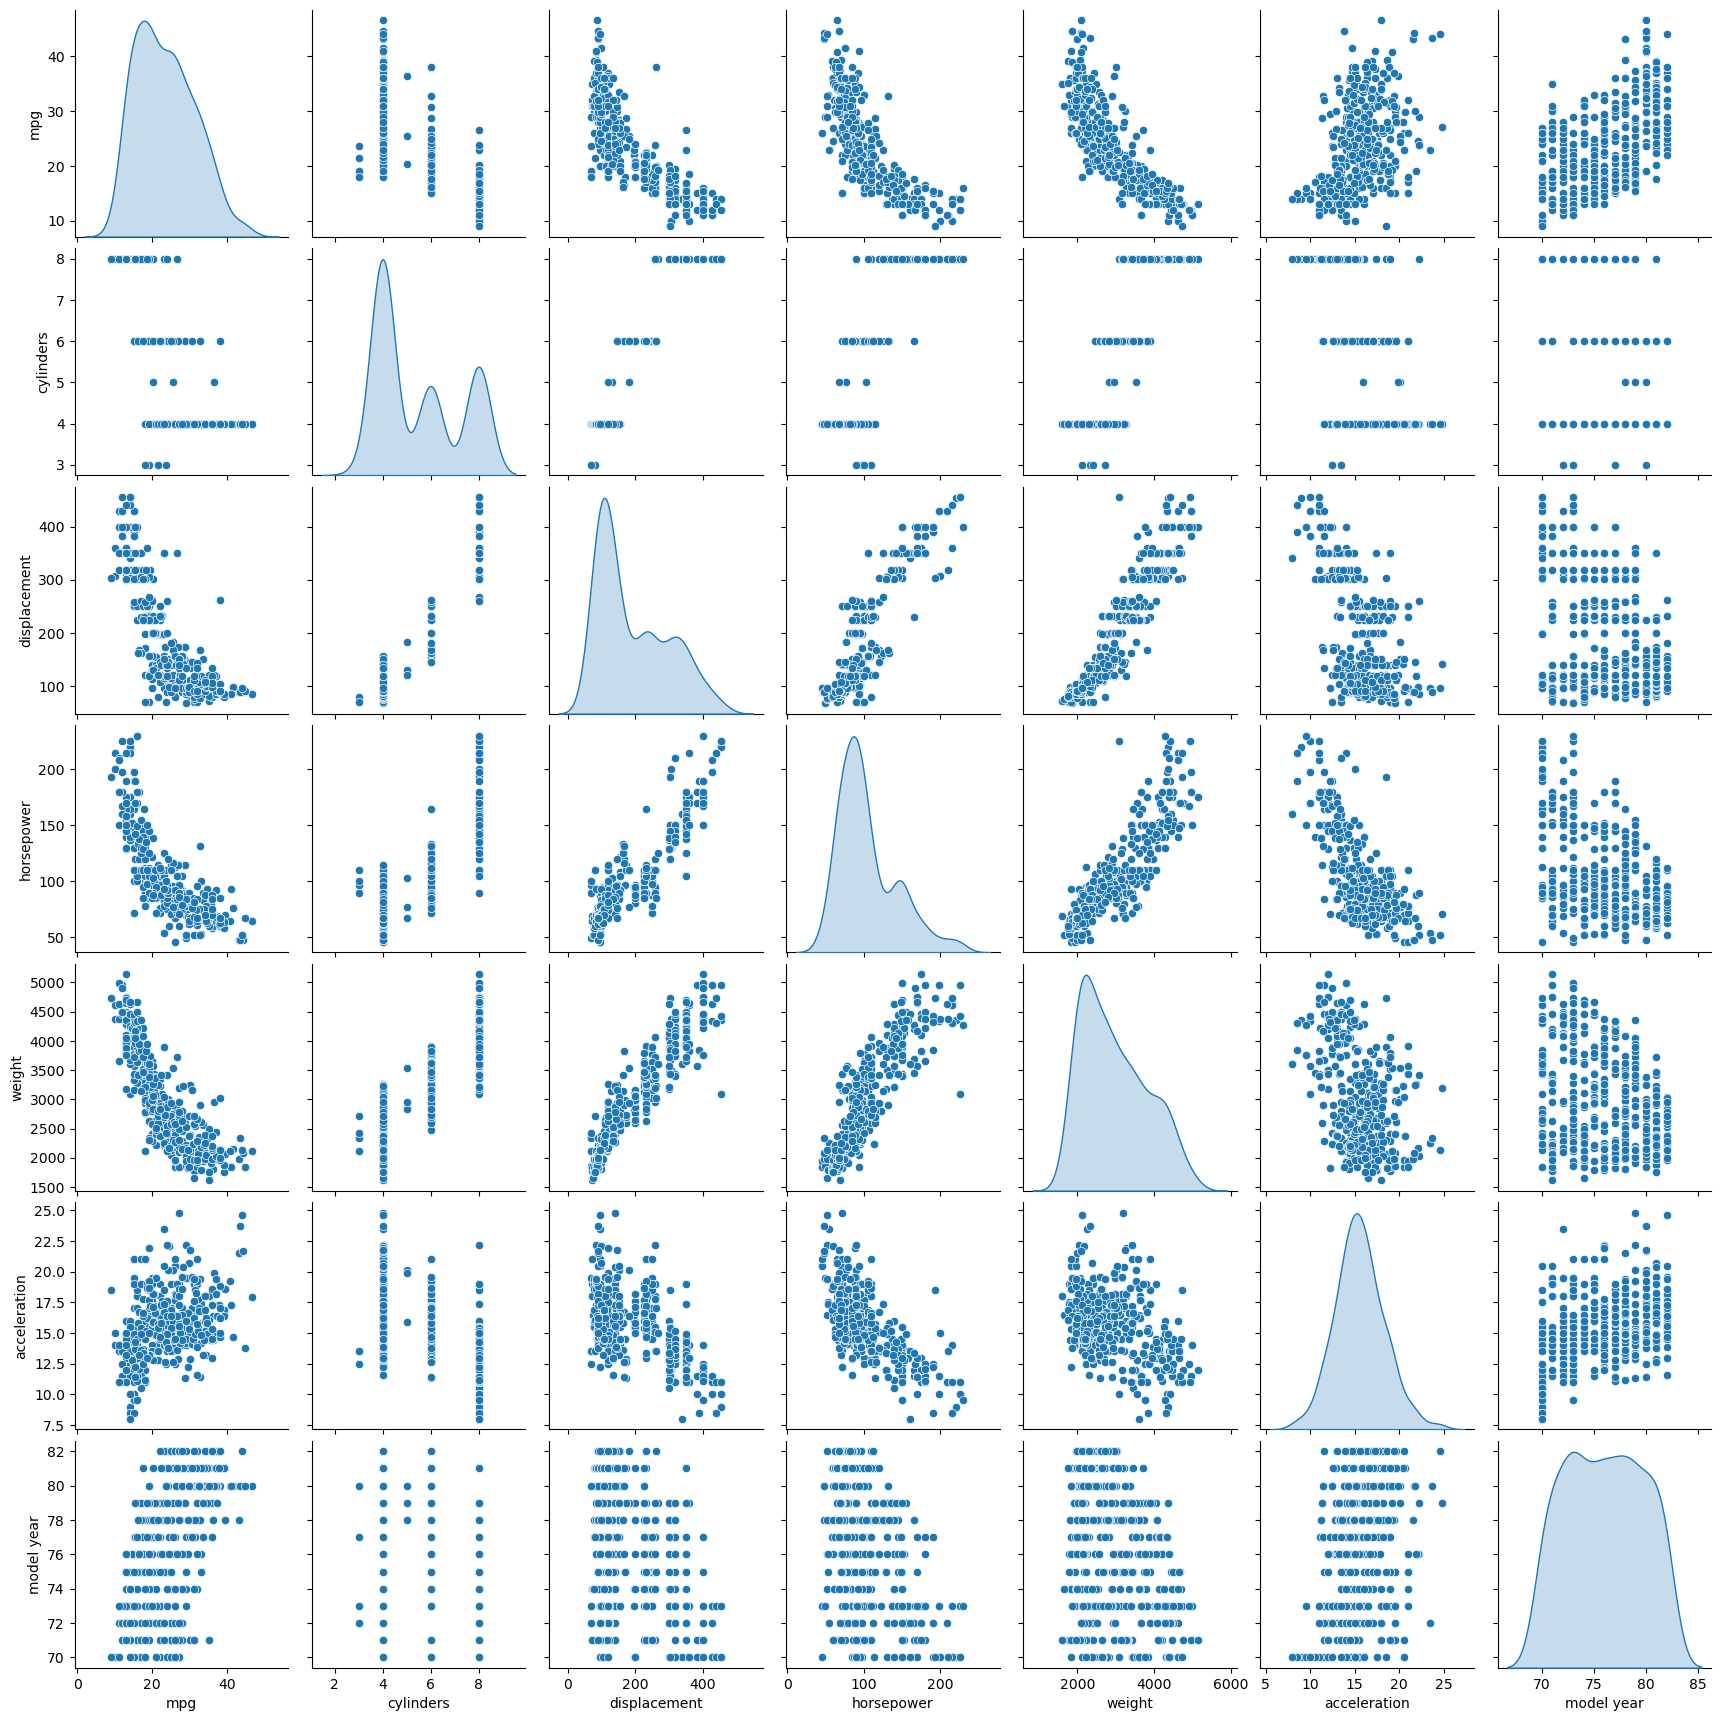

In [24]:
attr_select = df.iloc[:,0:7]
sns.pairplot(attr_select,diag_kind='kde')

In [25]:
x = df.drop(['mpg'],axis = 1)
y = df['mpg']


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

<IPython.core.display.Javascript object>

In [27]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

LinearRegression()

In [28]:
regression_model.coef_

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -1.79884935,  0.59641569,  1.20243366])

In [29]:
for index,name in enumerate (x_train.columns):
    print(f" {regression_model.coef_[index]} ,{name}")

 -0.3948079661648308 ,cylinders
 0.02894551076548753 ,displacement
 -0.021752207723547308 ,horsepower
 -0.007352032065147356 ,weight
 0.06191936600761812 ,acceleration
 0.8369338917645014 ,model year
 -1.7988493458374295 ,origin_america
 0.5964156907563433 ,origin_asie
 1.2024336550810855 ,origin_europe


In [30]:
print(regression_model.intercept_)

-19.485884771453275


In [31]:
regression_model.score(x_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

0.8141025501610559

In [32]:
regression_model.score(x_test,y_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

0.843313513280883

In [33]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asie,origin_europe
174,6,171.0,97.0,2984,14.5,75,1,0,0
359,4,141.0,80.0,3230,20.4,81,0,0,1
250,8,318.0,140.0,3735,13.2,78,1,0,0
274,5,131.0,103.0,2830,15.9,78,0,0,1
283,6,232.0,90.0,3265,18.2,79,1,0,0
...,...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,1,0
39,8,400.0,175.0,4464,11.5,71,1,0,0
171,4,134.0,96.0,2702,13.5,75,0,1,0
271,4,156.0,105.0,2745,16.7,78,1,0,0


In [34]:
regression_model.predict(x_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34